# What is PyTorch ?

It’s a Python based scientific computing package targeted at two sets of audiences:

- A replacement for numpy to use the power of GPUs
- A deep learning research platform that provides maximum flexibility and speed


In [ ]:
import numpy as np
import torch

In Google Colab, you can use Nvidia GPUs and TPUs for free! Check what kind of device is available:

In [ ]:
torch.cuda.is_available()

In [ ]:
torch.cuda.get_device_properties(0)

# PyTorch Tensors

A `torch.Tensor` is a multi-dimensional matrix containing elements of a single data type.

Tensors are similar to numpy’s ndarrays, but they have a super-power: Tensors can also be used on a GPU to accelerate computing.

## Creating Tensors
Construct a 5x3 matrix, uninitialized:



In [ ]:
x = torch.empty(5, 3, 2)
print(x)

Construct a randomly initialized matrix (uniform [0, 1]):



In [ ]:
x = torch.rand(5, 3)
print(x)

Construct a matrix filled with zeros or ones:

In [ ]:
x = torch.zeros(5, 3)
print(x)

In [ ]:
x = torch.ones([5, 3])
print(x)

Construct a tensor directly from data:



In [ ]:
x = torch.tensor([5.5, 3])
print(x)

In [ ]:
x = torch.tensor([[5.5, 3], [4, 6]])
print(x)

In [ ]:
np_array = np.array([[5.5, 3], [4, 6]])
print(np_array)
x = torch.tensor(np_array)
print(x)

## Tensor Attributes
Here are three frequently used tensor attributes:
- Shape
- Datatype
- Device

### Shape
To know the shape of a given tensor, you can use the `.size()` method or `.shape` like numpy.

In [ ]:
x = torch.zeros(2, 3, 4)
print(x)
print(x.size())
print(x.shape)

Since `torch.Size` object is a kind of tuple, you can use tuple operations. E.g.,

In [ ]:
x.shape[1:] + x.shape[:2]

Note: scalar is of shape `[]`.

In [ ]:
torch.tensor(3).shape

In [ ]:
torch.zeros([])

### Datatype
Use `.dtype` to see the datatype of a tensor. By default, it is `torch.float32`.

In [ ]:
x.dtype

### Device
Use `.device` to see which device the tensor is on. Most commonly used device is `cpu` and `cuda` (it's not `gpu`!). If there are multiple GPUs, you can also specify the device number, e.g., `cuda:2`. The default is `cpu`.

In [ ]:
x.device

### Specifying the Attributes
You can additionaly specify the attributes while creating a tensor. For instance, to create a long integer tensor on GPU,

In [ ]:
x = torch.zeros(5, 3, dtype=torch.long, device='cuda')
print(x)

## Tensor Operations
There are 100+ tensor operations. Here we introduce most commonly used operations.

Refer to the documentation for the full description: https://pytorch.org/docs/stable/index.html

### Indexing and Slicing
You can use standard NumPy-like indexing with all bells and whistles!

In [ ]:
x = torch.rand(5, 3)
print(x)
print(x[2, 1])

### Reshaping

To reshape tensors (e.g., flatten a 3D tensor to a 1D array), you can use the `.view(new_shape)` or `.reshape(new_shape)`.

> Note: `.view` simply provide a new "view" of a tensor (does not allocate new memory), while `.reshape` may allocate new memory if necessary.

> WARNING: When reshaping, you have to make sure that the number of elements is constant.
For example, a 2D matrix of size 3x3 can only be viewed as a 1D array of size $3 \cdot 3 = 9$

In [ ]:
# Create a 3D tensor of size 3x2x2
zeros_3d_tensor = torch.zeros(3, 2, 2)
print("Original size:", zeros_3d_tensor.shape)

# Reshape it to a 1D array of size 3*2*2 = 12
zeros_1d_array = zeros_3d_tensor.view(3 * 2 * 2)
print("Reshaped tensor:", zeros_1d_array.shape)


# Let's view our original tensor as a 2D matrix
# If you want PyTorch to guess one remaining dimension,
# you specify '-1' instead of the actual size
zeros_2d_matrix = zeros_3d_tensor.view(-1, 2 * 2)

print("Matrix shape:", zeros_2d_matrix.shape)

In [ ]:
zeros_3d_tensor

In [ ]:
zeros_1d_array

### Type Conversion

`Tensor.type()` returns the type if dtype is not provided, else casts this object to the specified type.

In [ ]:
x = torch.ones(3, 2)
print(x)
print(x.type())
print(x.type(torch.long))

### Copying to Other Devices

Use `Tensor.to()` to send a tensor to a specified device.

In [ ]:
x = torch.ones(3, 2)
print(x)
print(x.to('cuda'))

### Arithmetic Operations

Tensor supports all basic arithmetic operations, including `+`, `-`, `*`, `/`, `**`, ...

In [ ]:
ones = torch.ones(3, 2)
2 * ones + 1

When two tensors are with the same shape, the operation is performed element-wise.

In [ ]:
t1 = torch.tensor([1, 2, 3])
t2 = torch.tensor([4, 5, 6])
print(t1 + t2)

Note: There are other ways to add tensors as follows. These are all equivalent.

In [ ]:
print(t1 + t2)
print(torch.add(t1, t2))
print(t1.add(t2))

You can also do `exp` or `log` operations.

In [ ]:
t = torch.tensor([1., 2., 3.])
print(t.exp())
print(t.log())

#### Broadcasting
Even when the shapes are different, there are some cases the operation is "broadcastable." Specifically, two tensors are “broadcastable” if the following rules hold:
- Each tensor has at least one dimension.
- When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.

For example, we can perform addition of a [3, 2] shape matrix and [2] shape vector:

In [ ]:
torch.tensor([[1, 2], [3, 4], [5, 6]]) \
  + torch.tensor([1, 2])

which is equivalent to

In [ ]:
torch.tensor([[1, 2], [3, 4], [5, 6]]) \
  + torch.tensor([[1, 2], [1, 2], [1, 2]])

What if you want to add 1, 2, and 3 to each row?
```
torch.tensor([[1, 2], [3, 4], [5, 6]]) \
  + torch.tensor([1, 2, 3])
```
This code causes error. The correct answer is:

In [ ]:
torch.tensor([[1, 2], [3, 4], [5, 6]]) \
  + torch.tensor([[1], [2], [3]])

### Matrix Product
Multiplication `*` is used for element-wise multiplication. For matrix product, you need to use `torch.matmul`. It also supports vector-vector product, matrix-vector product, and their batched versions.

In [ ]:
print('vector x vector: [3] x [3]')
tensor1 = torch.randn(3)
tensor2 = torch.randn(3)
print(torch.matmul(tensor1, tensor2).size())
print()

print('matrix x vector: [3, 4] x [4]')
tensor1 = torch.randn(3, 4)
tensor2 = torch.randn(4)
print(torch.matmul(tensor1, tensor2).size())
print()

print('batched matrix x batched matrix: [10, 3, 4] x [10, 4, 5]')
tensor1 = torch.randn(10, 3, 4)
tensor2 = torch.randn(10, 4, 5)
print(torch.matmul(tensor1, tensor2).size())
print()

### Mean and Sum

Mean and sum are frequently used reduction operations. Without any additional argument, `mean` (or `sum`) returns the mean (or summation) value of the input tensor.

In [ ]:
x = torch.rand(3, 2, 2)
print(x)
print(torch.mean(x))
print(x.mean())  # equivalent, but shorter

You can specify a dimension or a list of dimensions to reduce. You can also choose to keep the reduced dimension by setting `keepdim=True`.

In [ ]:
print(x.mean(dim=2))  # reduce along the 3rd dim
print(x.mean(dim=2, keepdim=True))  # keep the 3rd dim
print(x.mean(dim=[1, 2]))  # reduce along dimension 1 & 2

### Min and Max

`min` and `max` work in a similar way to the `mean`. However, if `dim` is specified, they return a tuple of minimum (or maximum) value and the corresponding indices.

In [ ]:
x = torch.rand(5, 3)
print(x)
print(x.min())

In [ ]:
values, indices = x.min(dim=1)
print(values)
print(indices)

### Concatenating and Stacking
You often need to combine multiple tensors. If you want to concatenate tensors in an existing dimension, use `torch.cat`. If you want to stack tensors by creating a new dimension, use `torch.stack`.

In [ ]:
t1 = torch.zeros(3, 5)
t2 = torch.ones(4, 5)
t3 = torch.ones(3, 5)

# Concatenate multiple tensors in the given dimension
print('Concatenating 3x5 and 4x5 tensors in dimension 0:')
t = torch.cat([t1, t2], dim=0)
print(t)
print('Shape: {}'.format(t.shape))
print()

print('Stacking two 3x5 tensors in dimension 1:')
t = torch.stack([t1, t3], dim=1)
print(t)
print('Shape: {}'.format(t.shape))

### In-Place Operations

The operations we learned so far create a new tensor as a result, leaving the input tensors intact. On the other hand, inplace operations mutate existing tensors. In PyTorch, any operation that mutates a tensor in-place is post-fixed with an `_`, e.g., `add_`.

In [ ]:
t1 = torch.tensor([1, 2, 3])
t2 = torch.tensor([4, 5, 6])

print('t1.add(t2): ', end='')
print(t1.add(t2))
print('t1: ', end='')
print(t1)
print()

print('t1.add_(t2): ', end='')
print(t1.add_(t2))
print('t1: ', end='')
print(t1)

### Numpy Bridge
WARNING: PyTorch Tensors are different from numpy arrays
even if they have a lot in common

Though, it is easy with PyTorch to tranform Tensors to Numpy arrays and vice versa.

Creating PyTorch tensors from numpy array is done via the `torch.from_numpy()` function.

To transform a PyTorch tensor to a numpy array, you can simply call `.numpy()` method.

In [ ]:
# np.float32 -> torch.FloatTensor
ones_matrix = np.ones((2, 2), dtype=np.float32)

# the matrix is passed by reference:
# if we modify the original numpy array, the tensor is also edited
ones_tensor = torch.from_numpy(ones_matrix)
# Convert back to a numpy matrix
numpy_matrix = ones_tensor.numpy()

print("PyTorch Tensor:")
print(ones_tensor)

print("Numpy Matrix:")
print(numpy_matrix)

## Automatic Differentiation

Pytorch tensors allow to **automatically compute gradients**. That is particulary useful for backpropagation.

Once you finish your computation you can call `.backward()` and have all the gradients computed automatically.

You can access the gradient w.r.t. this variable using `.grad`.


In [ ]:
# We need to specify that we want to compute the gradient
# as it requires extra memory and computation
ones_tensor = torch.ones(2,2, requires_grad=True)

print(ones_tensor)

To demonstrate the use of PyTorch Variable,
let's define a simple linear transformation of a variable $x$ :

$$y = a \cdot x + b$$

PyTorch will allows us to automatically compute $$\frac{dy}{dx} $$

In [ ]:
# Create a tensor and tell PyTorch
# that we want to compute the gradient
x = torch.ones(1, requires_grad=True)

# Transformation constants
a = 2
b = 5

# Define the tranformation and store the result
# in a new variable
y = a * x + b

print(y)

In [ ]:
print(x.grad)

Let's backprop!

In [ ]:
y.backward()

`x.grad` prints the gradient:

$$\frac{dy}{dx} = a$$

because:

$$y = a \cdot x + b$$

In [ ]:
x.grad

You can now change the values of $a$ and $b$ see their effects on the gradient
(HINT: `x.grad` only depends on the value of `a`)

# Exercise

## Manipulating Tensors

You are given two tensors of shape [100, 32, 8, 8] and [100, 16, 4, 4].
1. Reshape each tensor to shape [100, 32x8x8] and [100, 16x4x4] respectively.
2. Concatenate the two reshaped tensors in dimension 1 (the second dimension).
3. Print the shape of the concatenated tensor.

In [ ]:
t1 = torch.rand(100, 32, 8, 8)
t2 = torch.rand(100, 16, 4, 4)

# TODO

## Normalization

We have a 4x3 matrix. Create two tensors according to the following description.
1. Normalize the matrix such that the whole matrix to have zero mean and unit variance.
2. Normalize each row to have zero mean and unit variance.

In other words, you need to perform this computation
$$
\frac{X - \mathbb E[X]}{\mathrm{std}(X)}
$$
for the whole matrix and for each row.
Do not use any loop.

> Hint: you may use `Tensor.mean()` and `Tensor.std()` to compute mean and standard deviation.

In [ ]:
t = torch.tensor(
    [[3., 0.5, -1.],
     [-5., 10., 3.],
     [34., 40., 35.],
     [-89., 23., 0.4]])

In [ ]:
# TODO

Once done correctly, you should get:
```
1.
tensor([[-0.0445, -0.1192, -0.1640],
        [-0.2835,  0.1645, -0.0445],
        [ 0.8813,  1.0604,  0.9111],
        [-2.7921,  0.5527, -0.1222]])

2.
tensor([[ 1.0722, -0.1650, -0.9073],
        [-1.0215,  0.9771,  0.0444],
        [-0.7259,  1.1406, -0.4148],
        [-1.1335,  0.7575,  0.3760]])
```
In fact, the first one corresponds to the batch normalization, while the second one corresponds to the instance normalization.

## Linear Regression

As a toy example, we are going to perform linear regression with gradient descent.
Let's say we are given the following dataset, which is generated from a linear model $y = 2x + 1 + \epsilon, \epsilon \sim \mathcal N(0, \sigma^2)$.

In [ ]:
# Synthetic data
x = torch.rand(500)
y = 2 * x + 1 + 0.2 * torch.randn(500)

import matplotlib.pyplot as plt

plt.scatter(x, y);

We are going to recover the underlying model by minimizing the L2 loss with gradient descent:
$$
\frac{1}{2}(y - \hat y)^2
$$
where $\hat y = ax + b$. $a$ and $b$ are our parameters.

In [ ]:
# Our parameters initialized to 0
a = torch.zeros([], requires_grad=True)
b = torch.zeros([], requires_grad=True)

In [ ]:
# Learning rate
lr = 0.1

for i in range(1000):
    # Reset gradient
    a.grad = None
    b.grad = None

    # TODO: Compute loss and its gradients w.r.t. a and b

    # Update value
    a.data -= lr * a.grad
    b.data -= lr * b.grad

print(a, b)

# Handling Data

PyTorch provides an elegant way to handle data. You can easily create new datasets by extending `Dataset` class, but in this tutorial, we will use existing datasets nicely packaged in `torchvision`. `torchvision` offers several other utilities along with popular vision datasets.

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import RandomSampler

import torchvision
import torchvision.transforms as transforms

## Dataset
As an example, we are going to load MNIST digit classification dataset. MNIST consists of 28x28 grayscale images of digits 0-9.
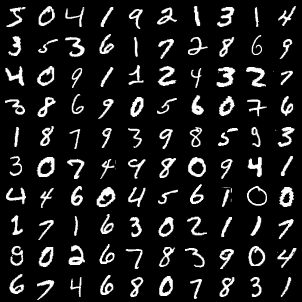

In [ ]:
train_set = torchvision.datasets.MNIST(
    'data', train=True, transform=transforms.ToTensor(), download=True)
test_set = torchvision.datasets.MNIST(
    'data', train=False, transform=transforms.ToTensor(), download=True)

isinstance(train_set, Dataset)

Let's check the first element of the `train_set`.

In [ ]:
train_set[0]

It is an image-label pair! You can visualize the image by converting it to PIL (Python image library) image.

In [ ]:
transforms.functional.to_pil_image(train_set[0][0])

The shape of image:

In [ ]:
print(train_set[0][0].shape)

Here are 100 image samples:

In [ ]:
transforms.functional.to_pil_image(torchvision.utils.make_grid(train_set.data[:100].unsqueeze(1), nrow=10))

## Transforms

You often want to tranfrom data to fit into your model. Or, you may want to augment data with some random tranformations. In PyTorch, you can do these by specifying `transform` while instantiating a dataset.

In the previous example, we simply used `ToTensor`, which convert the data into PyTorch tensors. You can do much more by composing multiple transformations by `Compose`.

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize((100, 100)),  # Resize to 100x100 image
     transforms.RandomRotation(15)  # Random rotation between degree [-30, 30]
     ])

train_set_augmented = torchvision.datasets.MNIST(
    'data', train=True, transform=transform, download=True)

transforms.functional.to_pil_image(train_set_augmented[0][0])

## Data Loader
During training, you need to randomly sample a mini-batch from the training set. `DataLoader` and various samplers will do the job.

In [ ]:
# This sampler will run for 1 epoch and terminate
sampler = RandomSampler(train_set)

# This sampler will run for 10k training steps
sampler = RandomSampler(train_set,
                        replacement=True,
                        num_samples=100 * 10000)

# Use the sampler to create a data loader
train_loader = DataLoader(
    train_set, batch_size=100, sampler=sampler, num_workers=4)

# Test loader runs for 1 epoch
test_loader = DataLoader(
    test_set, batch_size=200, num_workers=4)

## Iterating through the Data Loader

Now we have data loader, so we can iterate through the dataset.

In [ ]:
for x, y in train_loader:
    # x, y are the mini-batches of images and labels.
    # For now, let's just print the shape of x and y and exit.
    print(x.shape)
    print(y.shape)
    break

## Using Google Drive in Colab

You can mount your Google Drive to Colab virtual machine with the following code:

In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Now check the *Files* tab on the left of your Colab screen! Your Google Drive should be mounted at `/content/drive`.

## Creating a Dataset

`gemstones` folder contains the [Gemstones dataset](https://www.kaggle.com/lsind18/gemstones-images) which will be used for our project. It is structured like this:

```
drive/MyDrive/SNU-LGE 2022 Deep Learning
└── gemstones
    ├── test
    │   ├── Alexandrite
    |   |   ├── alexandrite_18.jpg
    |   |   ├── alexandrite_28.jpg
    |   |   ├── alexandrite_3.jpg
    |   |   └── alexandrite_6.jpg
    │   ├── Almandine
    │   ├── Amazonite
    |   ...
    │   └── Zoisite
    └── train
        ├── Alexandrite
        ├── Almandine
        ├── Amazonite
        ...
        └── Zoisite
```
About 3200 images are classified into 87 classes.

We are going to load this folder into a PyTorch dataset. If data is well-organized like this, we can simply use `torchvision.datasets.ImageFolder`.

In [ ]:
gem_root = 'drive/MyDrive/SNU-LGE 2022 Deep Learning/gemstones'

gem_train_set = torchvision.datasets.ImageFolder(
    root='{}/train'.format(gem_root), transform=transforms.ToTensor())
gem_test_set = torchvision.datasets.ImageFolder(
    root='{}/test'.format(gem_root), transform=transforms.ToTensor())

gem_train_set[0]